<div align="center"> 
    <hr>
  <font size="6"><b>Dev | Clean-Clean Entity Resolution Notebook</b> </font>
   <hr>
</div>

In [1]:
!python --version

Python 3.9.16


In [2]:
import os
import sys
import pandas as pd
import networkx
from networkx import draw, Graph
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from pyjedai.utils import (
    text_cleaning_method,
    print_clusters,
    print_blocks,
    print_candidate_pairs
)
from pyjedai.evaluation import Evaluation
from pyjedai.datamodel import Data
import nltk
nltk.download('punkt')
d1 = pd.read_csv("../data/ccer/D2/abt.csv", sep='|', engine='python')
d2 = pd.read_csv("../data/ccer/D2/buy.csv", sep='|', engine='python')
gt = pd.read_csv("../data/ccer/D2/gt.csv", sep='|', engine='python')


if 'aggregate value' in d1.columns.tolist():
    d1.drop(columns=['aggregate value'], inplace=True)

if 'aggregate value' in d2.columns.tolist():
    d2.drop(columns=['aggregate value'], inplace=True)

data = Data(
    dataset_1=d1,
    # attributes_1=['id','name','description'],
    id_column_name_1='id',
    dataset_2=d2,
    # attributes_2=['id','name','description'],
    id_column_name_2='id',
    ground_truth=gt,
)

[nltk_data] Downloading package stopwords to /home/jm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
data.dataset_2.iloc[216]

id                                      216
name           LG Navy Blue SteamWasher 27'
description                                
price                                      
Name: 216, dtype: object

In [4]:
data.print_specs()

------------------------- Data -------------------------
Type of Entity Resolution:  Clean-Clean
Dataset-1:
	Number of entities:  1076
	Number of NaN values:  0
	Attributes: 
		 ['name', 'description', 'price']
Dataset-2:
	Number of entities:  1076
	Number of NaN values:  0
	Attributes: 
		 ['name', 'description', 'price']

Total number of entities:  2152
Number of matching pairs in ground-truth:  1076
-------------------------------------------------------- 



In [5]:
data.dataset_1

,id,name,description,price
0,0,Sony Turntable - PSLX350H,Sony Turntable - PSLX350H/ Belt Drive System/ ...,
1,1,Bose Acoustimass 5 Series III Speaker System -...,Bose Acoustimass 5 Series III Speaker System -...,399.0
2,2,Sony Switcher - SBV40S,Sony Switcher - SBV40S/ Eliminates Disconnecti...,49.0
3,3,Sony 5 Disc CD Player - CDPCE375,Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...,
4,4,Bose 27028 161 Bookshelf Pair Speakers In Whit...,Bose 161 Bookshelf Speakers In White - 161WH/ ...,158.0
...,...,...,...,...
1071,1071,Logitech Cordless Desktop Wave Keyboard And Mo...,Logitech Cordless Desktop Wave Keyboard And Mo...,79.0
1072,1072,Mitsubishi DLP Black TV Stand - MBS73V,Mitsubishi DLP Black TV Stand - MBS73V/ Matchi...,549.0
1073,1073,Logitech Digital Precision PC Gaming Headset -...,Logitech Digital Precision PC Gaming Headset -...,49.0
1074,1074,Logitech 2.1 Multimedia Silver Speaker System ...,Logitech 2.1 Multimedia Silver Speaker System ...,


# Block Building

In [6]:
from pyjedai.block_building import (
    StandardBlocking,
    QGramsBlocking,
    ExtendedQGramsBlocking,
    SuffixArraysBlocking,
    ExtendedSuffixArraysBlocking,
)

/home/conda/miniconda3/envs/pyjedai-progressive/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
qgb = StandardBlocking()
blocks = qgb.build_blocks(data)

Standard Blocking: 100%|██████████| 2152/2152 [00:00<00:00, 17923.81it/s]


In [8]:
qgb.evaluate(blocks, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Standard Blocking
***************************************************************************************************************************
Method name: Standard Blocking
Parameters: 
Runtime: 0.1208 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.11% 
	Recall:        99.81%
	F1-score:       0.23%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1074
	False positives: 948081
	True negatives: 1156698
	False negatives: 2
	Total comparisons: 949155
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 0.11315327844240403,
 'Recall %': 99.81412639405205,
 'F1 %': 0.22605029724351236,
 'True Positives': 1074,
 'False Positives': 948081,
 'True Negatives': 1156698,
 'False Negatives': 2}

In [9]:
qgb.stats(blocks)

Statistics:
	Number of blocks: 2132
	Average block size: 19
	Median block size: 5
	Max block size: 818
	Min block size: 2
	Number of blocks dropped: 4516
	Number of comparisons: 949155
	Max comparisons per block: 94500
	Min comparisons per block: 1
	Entities in blocks: 2152
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


# Block Cleaning

In [10]:
from pyjedai.block_cleaning import BlockFiltering

In [11]:
bf = BlockFiltering(ratio=0.075)
filtered_blocks = bf.process(blocks, data, tqdm_disable=False)

Block Filtering: 100%|██████████| 3/3 [00:00<00:00, 136.93it/s]


In [12]:
bf.evaluate(filtered_blocks)

***************************************************************************************************************************
                                         Μethod:  Block Filtering
***************************************************************************************************************************
Method name: Block Filtering
Parameters: 
	Ratio: 0.075
Runtime: 0.0230 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     54.81% 
	Recall:        58.83%
	F1-score:      56.75%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 54.8051948051948,
 'Recall %': 58.82899628252788,
 'F1 %': 56.74585387718511,
 'True Positives': 633,
 'False Positives': 522,
 'True Negatives': 1156257,
 'False Negatives': 443}

In [13]:
from pyjedai.utils import java_math_round

ratio = 0.075
for e, b in bf.entity_index.items():
    print(e,",",java_math_round(ratio*float(len(b))))

2 , 1
1109 , 2
3 , 1
1268 , 1
4 , 1
1226 , 0
5 , 1
1264 , 0
6 , 1
1286 , 0
7 , 1
1234 , 0
8 , 1
1113 , 1
13 , 2
1270 , 1
17 , 2
1906 , 1
18 , 1
1284 , 1
21 , 1
1269 , 1
23 , 2
2045 , 1
1555 , 1
1820 , 2
25 , 1
1097 , 1
26 , 2
1274 , 1
1276 , 2
27 , 2
1123 , 1
28 , 2
1124 , 1
35 , 2
1272 , 1
36 , 1
1301 , 1
38 , 1
1265 , 1
39 , 2
44 , 1
1267 , 1
47 , 1
1155 , 1
48 , 1
1139 , 1
49 , 1
1177 , 1
51 , 2
1426 , 1
53 , 2
1200 , 1
54 , 1
1140 , 1
56 , 1
1182 , 2
57 , 1
1181 , 2
58 , 1
1096 , 1
61 , 1
1153 , 1
62 , 2
1135 , 1
64 , 2
1148 , 1
65 , 2
1150 , 1
66 , 2
1388 , 1
70 , 1
2013 , 0
72 , 1
1152 , 1
73 , 2
1758 , 2
75 , 1
1300 , 1
76 , 1
1362 , 0
78 , 1
1156 , 1
79 , 2
1222 , 1
80 , 1
1543 , 1
1151 , 1
83 , 1
1273 , 1
86 , 2
1283 , 1
87 , 2
1147 , 1
88 , 2
1125 , 1
89 , 2
98 , 2
1266 , 1
99 , 1
1094 , 1
100 , 1
1102 , 1
101 , 1
1209 , 0
104 , 1
1188 , 1
106 , 2
1167 , 1
107 , 2
1389 , 1
112 , 1
1127 , 1
114 , 1
1198 , 1
116 , 2
1101 , 0
118 , 1
1205 , 0
119 , 1
1195 , 0
120 , 1
1341 , 1
12

In [14]:
bf.export_to_df(filtered_blocks)

,id1,id2
0,2,33
1,865,33
2,40,33
3,871,33
4,3,192
...,...,...
1150,985,541
1151,985,563
1152,1012,541
1153,1012,563


In [15]:
bf.stats(filtered_blocks)

Statistics:
	Number of blocks: 788
	Average block size: 2
	Median block size: 2
	Max block size: 9
	Min block size: 2
	Number of blocks dropped: 1344
	Number of comparisons: 1155
	Max comparisons per block: 12
	Min comparisons per block: 1
	Entities in blocks: 1571
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


# Comparison Cleaning


In [16]:
from pyjedai.block_cleaning import BlockPurging

In [17]:
cbbp = BlockPurging()
cleaned_blocks = cbbp.process(filtered_blocks, data, tqdm_disable=False)

Block Purging: 100%|██████████| 1576/1576 [00:00<00:00, 604059.50it/s]


In [18]:
cbbp.evaluate(cleaned_blocks, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Block Purging
***************************************************************************************************************************
Method name: Block Purging
Parameters: 
	Smoothing factor: 1.025
	Max Comparisons per Block: 12.0
Runtime: 0.0034 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     54.81% 
	Recall:        58.83%
	F1-score:      56.75%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 633
	False positives: 522
	True negatives: 1156257
	False negatives: 443
	Total comparisons: 1155
─────────────────────────────────────────────────────────────────────────────────────────────────

{'Precision %': 54.8051948051948,
 'Recall %': 58.82899628252788,
 'F1 %': 56.74585387718511,
 'True Positives': 633,
 'False Positives': 522,
 'True Negatives': 1156257,
 'False Negatives': 443}

In [19]:
cbbp.export_to_df(cleaned_blocks)

,id1,id2
0,2,33
1,865,33
2,40,33
3,871,33
4,3,192
...,...,...
1150,985,541
1151,985,563
1152,1012,541
1153,1012,563


## Meta Blocking

In [20]:
from pyjedai.comparison_cleaning import (
    WeightedEdgePruning,
    WeightedNodePruning,
    CardinalityEdgePruning,
    CardinalityNodePruning,
    BLAST,
    ReciprocalCardinalityNodePruning,
    ReciprocalWeightedNodePruning,
    ComparisonPropagation
)

In [21]:
wep = CardinalityEdgePruning(weighting_scheme='X2')
candidate_pairs_blocks = wep.process(filtered_blocks, data)

Cardinality Edge Pruning: 100%|██████████| 1076/1076 [00:00<00:00, 61641.35it/s]


In [22]:
wep.evaluate(candidate_pairs_blocks, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Cardinality Edge Pruning
***************************************************************************************************************************
Method name: Cardinality Edge Pruning
Parameters: 
	Node centric: False
	Weighting scheme: X2
Runtime: 0.0179 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 604
	False positives: 344
	True negatives: 1156228
	False negatives: 472
	Total comparisons: 948
───────────────────────────────────────────────────────────────────────────────────────────

{'Precision %': 63.71308016877637,
 'Recall %': 56.13382899628253,
 'F1 %': 59.683794466403164,
 'True Positives': 604,
 'False Positives': 344,
 'True Negatives': 1156228,
 'False Negatives': 472}

# Entity Matching

It compares pairs of entity profiles, associating every pair with a similarity in [0,1]. Its output comprises the similarity graph, i.e., an undirected, weighted graph where the nodes correspond to entities and the edges connect pairs of compared entities.

In [23]:
from pyjedai.matching import EntityMatching

In [24]:
EM = EntityMatching(
    metric='jaccard',
    tokenizer='word_tokenizer',
    qgram=5,
    similarity_threshold=0.0
)

pairs_graph = EM.predict(candidate_pairs_blocks, data, tqdm_disable=True)

In [25]:
EM.evaluate(pairs_graph)

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.2330 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     92.19% 
	Recall:        10.97%
	F1-score:      19.60%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 92.1875,
 'Recall %': 10.966542750929369,
 'F1 %': 19.601328903654487,
 'True Positives': 118,
 'False Positives': 10,
 'True Negatives': 1155742,
 'False Negatives': 958}

In [26]:
data.entities

,id,name,description,price
0,0,Sony Turntable - PSLX350H,Sony Turntable - PSLX350H/ Belt Drive System/ ...,
1,1,Bose Acoustimass 5 Series III Speaker System -...,Bose Acoustimass 5 Series III Speaker System -...,399.0
2,2,Sony Switcher - SBV40S,Sony Switcher - SBV40S/ Eliminates Disconnecti...,49.0
3,3,Sony 5 Disc CD Player - CDPCE375,Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...,
4,4,Bose 27028 161 Bookshelf Pair Speakers In Whit...,Bose 161 Bookshelf Speakers In White - 161WH/ ...,158.0
...,...,...,...,...
2147,1071,Sony VAIO FW378J/B Notebook - VGNFW378J/B,Intel Centrino 2 Core 2 Duo P8600 2.4GHz - 16....,
2148,1072,Sennheiser CX380 Sennheiser CX 380 Sport II Gr...,,
2149,1073,IWORK 09 RETAIL-INT DVD - MB942Z/A,,
2150,1074,IWORK 09 FAMILY PACK-INT DVD - MB943Z/A,,


In [27]:
string_metrics = [
    'jaro', 'edit_distance'
]

set_metrics = [
    'cosine', 'dice', 'generalized_jaccard', 'jaccard', 'overlap_coefficient'
]

char_tokenizers = ['char_tokenizer']
word_tokenizers = ['word_tokenizer']
magellan_tokenizers = ['white_space_tokenizer']
tok = char_tokenizers + word_tokenizers + magellan_tokenizers

for m in string_metrics+set_metrics:
    for t in tok:
        for qgram in range(1,6):
            print("\nM =",m,"\nT =",t)
            EM = EntityMatching(metric = m, 
                                tokenizer = t, 
                                qgram = qgram,
                                similarity_threshold = 0.0)

            pairs_graph = EM.predict(candidate_pairs_blocks, data)
            EM.evaluate(pairs_graph)


M = jaro 
T = char_tokenizer


Entity Matching (jaro, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 9918.46it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaro
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.0788 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaro 
T = char_tokenizer


Entity Matching (jaro, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 5253.83it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaro
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.1481 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaro 
T = char_tokenizer


Entity Matching (jaro, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 10066.14it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaro
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.0770 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaro 
T = char_tokenizer


Entity Matching (jaro, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 10120.71it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaro
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.0768 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaro 
T = char_tokenizer


Entity Matching (jaro, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 9990.43it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaro
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.0783 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaro 
T = word_tokenizer


Entity Matching (jaro, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 9961.83it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaro
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.0774 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaro 
T = word_tokenizer


Entity Matching (jaro, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 10130.47it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaro
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.0768 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaro 
T = word_tokenizer


Entity Matching (jaro, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 10058.00it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaro
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.0773 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaro 
T = word_tokenizer


Entity Matching (jaro, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 10022.60it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaro
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.0775 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaro 
T = word_tokenizer


Entity Matching (jaro, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 10039.71it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaro
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.0774 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaro 
T = white_space_tokenizer


Entity Matching (jaro, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 10030.07it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaro
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.0774 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaro 
T = white_space_tokenizer


Entity Matching (jaro, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 10109.84it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaro
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.0771 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaro 
T = white_space_tokenizer


Entity Matching (jaro, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 10108.96it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaro
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.0768 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaro 
T = white_space_tokenizer


Entity Matching (jaro, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 10132.81it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaro
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.0767 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaro 
T = white_space_tokenizer


Entity Matching (jaro, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 10205.92it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaro
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.0767 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = edit_distance 
T = char_tokenizer


Entity Matching (edit_distance, char_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 646.41it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: edit_distance
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 1.1938 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = edit_distance 
T = char_tokenizer


Entity Matching (edit_distance, char_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 653.46it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: edit_distance
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 1.1851 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = edit_distance 
T = char_tokenizer


Entity Matching (edit_distance, char_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 655.03it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: edit_distance
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 1.1829 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = edit_distance 
T = char_tokenizer


Entity Matching (edit_distance, char_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 659.71it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: edit_distance
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 1.1741 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = edit_distance 
T = char_tokenizer


Entity Matching (edit_distance, char_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 660.42it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: edit_distance
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 1.1732 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = edit_distance 
T = word_tokenizer


Entity Matching (edit_distance, word_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 657.36it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: edit_distance
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 1.1790 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = edit_distance 
T = word_tokenizer


Entity Matching (edit_distance, word_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 655.37it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: edit_distance
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 1.1817 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = edit_distance 
T = word_tokenizer


Entity Matching (edit_distance, word_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 655.54it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: edit_distance
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 1.1814 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = edit_distance 
T = word_tokenizer


Entity Matching (edit_distance, word_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 655.57it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: edit_distance
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 1.1814 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = edit_distance 
T = word_tokenizer


Entity Matching (edit_distance, word_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 660.37it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: edit_distance
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 1.1737 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = edit_distance 
T = white_space_tokenizer


Entity Matching (edit_distance, white_space_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 659.30it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: edit_distance
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 1.1746 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = edit_distance 
T = white_space_tokenizer


Entity Matching (edit_distance, white_space_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 658.68it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: edit_distance
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 1.1766 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = edit_distance 
T = white_space_tokenizer


Entity Matching (edit_distance, white_space_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 655.57it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: edit_distance
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 1.1813 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = edit_distance 
T = white_space_tokenizer


Entity Matching (edit_distance, white_space_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 655.44it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: edit_distance
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 1.1825 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = edit_distance 
T = white_space_tokenizer


Entity Matching (edit_distance, white_space_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 652.89it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: edit_distance
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 1.1871 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = cosine 
T = char_tokenizer


Entity Matching (cosine, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 8576.18it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.0919 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = cosine 
T = char_tokenizer


Entity Matching (cosine, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 7003.14it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.1118 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = cosine 
T = char_tokenizer


Entity Matching (cosine, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 6741.64it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.1156 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.78% 
	Recall:        56.13%
	F1-score:      59.71%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = cosine 
T = char_tokenizer


Entity Matching (cosine, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 6688.75it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.1167 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.92% 
	Recall:        56.13%
	F1-score:      59.77%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = cosine 
T = char_tokenizer


Entity Matching (cosine, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 6624.19it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.1175 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     64.67% 
	Recall:        56.13%
	F1-score:      60.10%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = cosine 
T = word_tokenizer


Entity Matching (cosine, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3460.78it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.2244 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.02% 
	Recall:        56.13%
	F1-score:      60.25%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = cosine 
T = word_tokenizer


Entity Matching (cosine, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3437.58it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.2259 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     79.97% 
	Recall:        53.07%
	F1-score:      63.80%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = cosine 
T = word_tokenizer


Entity Matching (cosine, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3426.72it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.2266 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     82.35% 
	Recall:        36.43%
	F1-score:      50.52%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = cosine 
T = word_tokenizer


Entity Matching (cosine, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3380.63it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.2296 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     87.55% 
	Recall:        19.61%
	F1-score:      32.04%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = cosine 
T = word_tokenizer


Entity Matching (cosine, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3386.94it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.2294 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     92.19% 
	Recall:        10.97%
	F1-score:      19.60%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = cosine 
T = white_space_tokenizer


Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 4491.51it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.1730 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = cosine 
T = white_space_tokenizer


Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13185.46it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.0594 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = cosine 
T = white_space_tokenizer


Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13188.30it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.0594 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = cosine 
T = white_space_tokenizer


Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13138.13it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.0600 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = cosine 
T = white_space_tokenizer


Entity Matching (cosine, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13046.83it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: cosine
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.0601 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = dice 
T = char_tokenizer


Entity Matching (dice, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 8551.60it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.0912 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = dice 
T = char_tokenizer


Entity Matching (dice, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 6999.28it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.1113 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = dice 
T = char_tokenizer


Entity Matching (dice, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 6718.12it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.1160 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.78% 
	Recall:        56.13%
	F1-score:      59.71%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = dice 
T = char_tokenizer


Entity Matching (dice, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 6668.70it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.1177 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.92% 
	Recall:        56.13%
	F1-score:      59.77%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = dice 
T = char_tokenizer


Entity Matching (dice, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 6561.08it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.1187 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     64.67% 
	Recall:        56.13%
	F1-score:      60.10%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = dice 
T = word_tokenizer


Entity Matching (dice, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3405.19it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.2281 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.02% 
	Recall:        56.13%
	F1-score:      60.25%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = dice 
T = word_tokenizer


Entity Matching (dice, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3415.86it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.2274 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     79.97% 
	Recall:        53.07%
	F1-score:      63.80%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = dice 
T = word_tokenizer


Entity Matching (dice, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3389.21it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.2291 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     82.35% 
	Recall:        36.43%
	F1-score:      50.52%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = dice 
T = word_tokenizer


Entity Matching (dice, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3395.72it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.2287 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     87.55% 
	Recall:        19.61%
	F1-score:      32.04%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = dice 
T = word_tokenizer


Entity Matching (dice, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3398.54it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.2285 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     92.19% 
	Recall:        10.97%
	F1-score:      19.60%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = dice 
T = white_space_tokenizer


Entity Matching (dice, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13037.35it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.0601 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = dice 
T = white_space_tokenizer


Entity Matching (dice, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13052.55it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.0600 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = dice 
T = white_space_tokenizer


Entity Matching (dice, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 12867.34it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.0617 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = dice 
T = white_space_tokenizer


Entity Matching (dice, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 12923.69it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.0606 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = dice 
T = white_space_tokenizer


Entity Matching (dice, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13114.40it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: dice
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.0607 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = generalized_jaccard 
T = char_tokenizer


Entity Matching (generalized_jaccard, char_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 525.48it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: generalized_jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 1.4737 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = generalized_jaccard 
T = char_tokenizer


Entity Matching (generalized_jaccard, char_tokenizer): 100%|██████████| 774/774 [00:17<00:00, 44.76it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: generalized_jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 17.2922 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = generalized_jaccard 
T = char_tokenizer


Entity Matching (generalized_jaccard, char_tokenizer): 100%|██████████| 774/774 [00:30<00:00, 25.67it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: generalized_jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 30.1527 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = generalized_jaccard 
T = char_tokenizer


Entity Matching (generalized_jaccard, char_tokenizer): 100%|██████████| 774/774 [00:34<00:00, 22.37it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: generalized_jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 34.5948 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = generalized_jaccard 
T = char_tokenizer


Entity Matching (generalized_jaccard, char_tokenizer): 100%|██████████| 774/774 [00:38<00:00, 19.89it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: generalized_jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 38.9134 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = generalized_jaccard 
T = word_tokenizer


Entity Matching (generalized_jaccard, word_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 647.26it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: generalized_jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 1.1969 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = generalized_jaccard 
T = word_tokenizer


Entity Matching (generalized_jaccard, word_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 482.89it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: generalized_jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 1.6045 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = generalized_jaccard 
T = word_tokenizer


Entity Matching (generalized_jaccard, word_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 399.49it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: generalized_jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 1.9382 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = generalized_jaccard 
T = word_tokenizer


Entity Matching (generalized_jaccard, word_tokenizer): 100%|██████████| 774/774 [00:02<00:00, 340.10it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: generalized_jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 2.2773 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = generalized_jaccard 
T = word_tokenizer


Entity Matching (generalized_jaccard, word_tokenizer): 100%|██████████| 774/774 [00:02<00:00, 296.05it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: generalized_jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 2.6159 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = generalized_jaccard 
T = white_space_tokenizer


Entity Matching (generalized_jaccard, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 796.95it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: generalized_jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.9717 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = generalized_jaccard 
T = white_space_tokenizer


Entity Matching (generalized_jaccard, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 802.06it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: generalized_jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.9660 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = generalized_jaccard 
T = white_space_tokenizer


Entity Matching (generalized_jaccard, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 805.87it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: generalized_jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.9618 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = generalized_jaccard 
T = white_space_tokenizer


Entity Matching (generalized_jaccard, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 801.78it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: generalized_jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.9660 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = generalized_jaccard 
T = white_space_tokenizer


Entity Matching (generalized_jaccard, white_space_tokenizer): 100%|██████████| 774/774 [00:01<00:00, 767.19it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: generalized_jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 1.0099 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaccard 
T = char_tokenizer


Entity Matching (jaccard, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3896.25it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.1993 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaccard 
T = char_tokenizer


Entity Matching (jaccard, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 6425.37it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.1212 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaccard 
T = char_tokenizer


Entity Matching (jaccard, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 6072.13it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.1285 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.78% 
	Recall:        56.13%
	F1-score:      59.71%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaccard 
T = char_tokenizer


Entity Matching (jaccard, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 6184.71it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.1258 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.92% 
	Recall:        56.13%
	F1-score:      59.77%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaccard 
T = char_tokenizer


Entity Matching (jaccard, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 6123.95it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.1269 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     64.67% 
	Recall:        56.13%
	F1-score:      60.10%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaccard 
T = word_tokenizer


Entity Matching (jaccard, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3143.45it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.2469 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.02% 
	Recall:        56.13%
	F1-score:      60.25%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaccard 
T = word_tokenizer


Entity Matching (jaccard, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3483.12it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.2228 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     79.97% 
	Recall:        53.07%
	F1-score:      63.80%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaccard 
T = word_tokenizer


Entity Matching (jaccard, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3498.84it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.2219 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     82.35% 
	Recall:        36.43%
	F1-score:      50.52%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaccard 
T = word_tokenizer


Entity Matching (jaccard, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3493.61it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.2222 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     87.55% 
	Recall:        19.61%
	F1-score:      32.04%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaccard 
T = word_tokenizer


Entity Matching (jaccard, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3487.14it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.2226 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     92.19% 
	Recall:        10.97%
	F1-score:      19.60%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaccard 
T = white_space_tokenizer


Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13345.25it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.0587 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaccard 
T = white_space_tokenizer


Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13430.66it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.0582 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaccard 
T = white_space_tokenizer


Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13211.27it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.0593 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaccard 
T = white_space_tokenizer


Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13437.27it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.0582 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = jaccard 
T = white_space_tokenizer


Entity Matching (jaccard, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13352.05it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: jaccard
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.0586 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = overlap_coefficient 
T = char_tokenizer


Entity Matching (overlap_coefficient, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 8659.26it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.0901 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = overlap_coefficient 
T = char_tokenizer


Entity Matching (overlap_coefficient, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 7139.15it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.1092 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.71% 
	Recall:        56.13%
	F1-score:      59.68%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = overlap_coefficient 
T = char_tokenizer


Entity Matching (overlap_coefficient, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 6882.10it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.1132 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.78% 
	Recall:        56.13%
	F1-score:      59.71%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = overlap_coefficient 
T = char_tokenizer


Entity Matching (overlap_coefficient, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 6745.85it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.1155 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     63.92% 
	Recall:        56.13%
	F1-score:      59.77%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = overlap_coefficient 
T = char_tokenizer


Entity Matching (overlap_coefficient, char_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 6765.40it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: char_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.1156 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     64.67% 
	Recall:        56.13%
	F1-score:      60.10%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = overlap_coefficient 
T = word_tokenizer


Entity Matching (overlap_coefficient, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3581.36it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.2168 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.02% 
	Recall:        56.13%
	F1-score:      60.25%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = overlap_coefficient 
T = word_tokenizer


Entity Matching (overlap_coefficient, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3530.79it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.2199 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     79.97% 
	Recall:        53.07%
	F1-score:      63.80%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = overlap_coefficient 
T = word_tokenizer


Entity Matching (overlap_coefficient, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3518.39it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.2208 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     82.35% 
	Recall:        36.43%
	F1-score:      50.52%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = overlap_coefficient 
T = word_tokenizer


Entity Matching (overlap_coefficient, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3533.19it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.2199 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     87.55% 
	Recall:        19.61%
	F1-score:      32.04%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = overlap_coefficient 
T = word_tokenizer


Entity Matching (overlap_coefficient, word_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 3499.52it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: word_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.2219 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     92.19% 
	Recall:        10.97%
	F1-score:      19.60%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = overlap_coefficient 
T = white_space_tokenizer


Entity Matching (overlap_coefficient, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13358.70it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 1
Runtime: 0.0587 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = overlap_coefficient 
T = white_space_tokenizer


Entity Matching (overlap_coefficient, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13616.27it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 2
Runtime: 0.0582 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = overlap_coefficient 
T = white_space_tokenizer


Entity Matching (overlap_coefficient, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13500.98it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 3
Runtime: 0.0580 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = overlap_coefficient 
T = white_space_tokenizer


Entity Matching (overlap_coefficient, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13440.00it/s]


***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 4
Runtime: 0.0584 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

M = overlap_coefficient 
T = white_space_tokenizer


Entity Matching (overlap_coefficient, white_space_tokenizer): 100%|██████████| 774/774 [00:00<00:00, 13876.43it/s]

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.0565 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


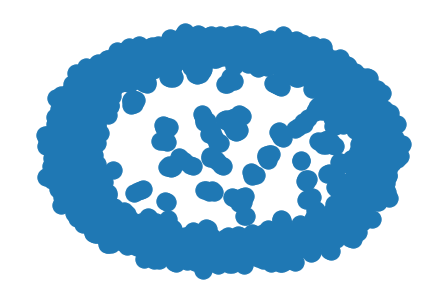

In [28]:
draw(pairs_graph)

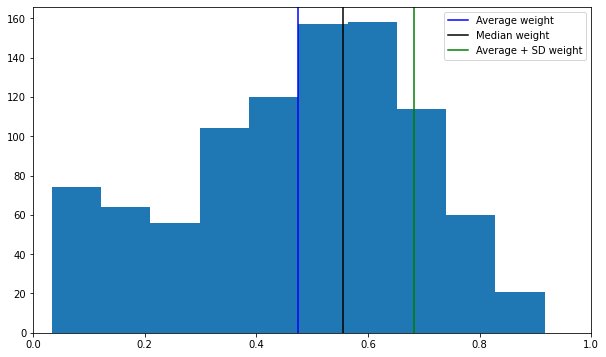

In [29]:
EM.plot_distribution_of_all_weights()

Distribution-% of predicted scores:  [5.711206896551724, 7.112068965517242, 8.081896551724139, 11.637931034482758, 13.36206896551724, 21.982758620689655, 16.70258620689655, 11.530172413793103, 3.556034482758621, 0.3232758620689655]


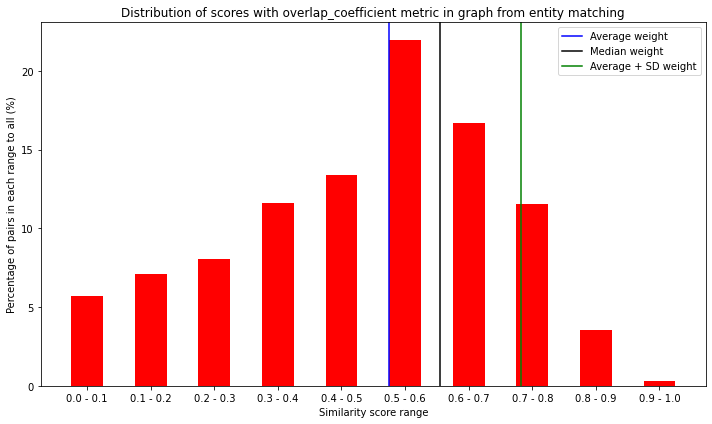

In [30]:
EM.plot_distribution_of_scores()

In [31]:
EM.evaluate(pairs_graph)

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.0565 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 65.08620689655173,
 'Recall %': 56.13382899628253,
 'F1 %': 60.27944111776448,
 'True Positives': 604,
 'False Positives': 324,
 'True Negatives': 1156228,
 'False Negatives': 472}

In [32]:
# Fill NaN values with empty string
data.dataset_1 = data.dataset_1.fillna("", inplace=True)
if not data.is_dirty_er:
    data.dataset_2 = data.dataset_2.fillna("", inplace=True)

In [33]:
EM.evaluate(pairs_graph)

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Metric: overlap_coefficient
	Attributes: None
	Similarity threshold: 0.0
	Tokenizer: white_space_tokenizer
	Vectorizer: None
	Qgrams: 5
Runtime: 0.0565 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     65.09% 
	Recall:        56.13%
	F1-score:      60.28%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 65.08620689655173,
 'Recall %': 56.13382899628253,
 'F1 %': 60.27944111776448,
 'True Positives': 604,
 'False Positives': 324,
 'True Negatives': 1156228,
 'False Negatives': 472}

# Entity Clustering

It takes as input the similarity graph produced by Entity Matching and partitions it into a set of equivalence clusters, with every cluster corresponding to a distinct real-world object.

In [34]:
from pyjedai.clustering import ConnectedComponentsClustering, UniqueMappingClustering

In [35]:
ccc = ConnectedComponentsClustering()
clusters = ccc.process(pairs_graph, data)

In [36]:
ccc.evaluate(clusters, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Connected Components Clustering
***************************************************************************************************************************
Method name: Connected Components Clustering
Parameters: 
Runtime: 0.0036 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     95.36% 
	Recall:        42.01%
	F1-score:      58.32%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 452
	False positives: 22
	True negatives: 1156076
	False negatives: 624
	Total comparisons: 474
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

{'Precision %': 95.35864978902954,
 'Recall %': 42.00743494423792,
 'F1 %': 58.322580645161295,
 'True Positives': 452,
 'False Positives': 22,
 'True Negatives': 1156076,
 'False Negatives': 624}

In [37]:
from pyjedai.clustering import ConnectedComponentsClustering, UniqueMappingClustering
umc = UniqueMappingClustering()
clusters = umc.process(pairs_graph, data)

In [38]:
umc.evaluate(clusters, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
Runtime: 0.0051 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     90.80% 
	Recall:        55.02%
	F1-score:      68.52%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 592
	False positives: 60
	True negatives: 1156216
	False negatives: 484
	Total comparisons: 652
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 90.79754601226993,
 'Recall %': 55.01858736059479,
 'F1 %': 68.5185185185185,
 'True Positives': 592,
 'False Positives': 60,
 'True Negatives': 1156216,
 'False Negatives': 484}

In [39]:
umc.export_to_df(clusters)

,id1,id2
0,1043,722
1,289,341
2,778,468
3,185,314
4,389,601
...,...,...
647,755,996
648,452,558
649,735,975
650,423,727
